<a href="https://colab.research.google.com/github/martinclehman/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

haberman_survival_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
survival_data = pd.read_csv(haberman_survival_data_url)

In [8]:
#Check number of observations:
survival_data.shape

(305, 4)

In [9]:
#Ah, missing one observation. Let's check the data
survival_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [10]:
#Columns header is mislabeled using the first row of data. So we should set header equals none
survival_data = pd.read_csv(haberman_survival_data_url,header=None)
survival_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [12]:
#Now, add informative names to the features from attribute information given
column_headers = ['age', 'year_of_operation', 'num_nodes', 'survival_status']
survival_data = pd.read_csv(haberman_survival_data_url,names=column_headers)
survival_data.head()

,age,year_of_operation,num_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
#Let's scan survival_status values
survival_data['survival_status'].value_counts(dropna=False)

1    225
2     81
Name: survival_status, dtype: int64

In [17]:
#Reassign values of survival status to '0' for not surviving and '1' for surviving >5 years
survival_data['survival_status'] = (survival_data['survival_status'] == 1).astype(int)
survival_data['survival_status'].value_counts(dropna=False)

1    225
0     81
Name: survival_status, dtype: int64

In [18]:
#Final check of data
survival_data.head()

,age,year_of_operation,num_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [19]:
#Summary statistics
survival_data.describe()

,age,year_of_operation,num_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [105]:
#Crosstab to see what's going on - Naturally apprent, older patients generally have lower chance of survival. 
age_bins = pd.cut(survival_data['age'], 5)  # 5 equal-sized bins
pd.crosstab(age_bins,survival_data['survival_status'], normalize='index')

survival_status,0,1
age,,
"(29.947, 40.6]",0.093023,0.906977
"(40.6, 51.2]",0.313131,0.686869
"(51.2, 61.8]",0.281250,0.718750
"(61.8, 72.4]",0.271186,0.728814
"(72.4, 83.0]",0.333333,0.666667


In [92]:
#Crosstab to see what's going on - The more number of positive axillary nodes detected generally have a lower chance of survival. 
#                                  The last bins beyond about num nodes above around 10 appear dominated by noisy data.
nodes_bins = pd.cut(survival_data['num_nodes'], 20)  # 20 equal-sized bins
pd.crosstab(nodes_bins,survival_data['survival_status'], normalize='index')

survival_status,0,1
num_nodes,,
"(-0.052, 2.6]",0.162437,0.837563
"(2.6, 5.2]",0.358974,0.641026
"(5.2, 7.8]",0.357143,0.642857
"(7.8, 10.4]",0.437500,0.562500
"(10.4, 13.0]",0.727273,0.272727
"(13.0, 15.6]",0.428571,0.571429
"(15.6, 18.2]",0.333333,0.666667
"(18.2, 20.8]",0.600000,0.400000
"(20.8, 23.4]",0.714286,0.285714


In [100]:
#Crosstab to see what's going on - 
year_op_bins = pd.cut(survival_data['year_of_operation'], 10)  # 5 equal-sized bins
pd.crosstab(year_op_bins,survival_data['survival_status'], normalize='index')

survival_status,0,1
year_of_operation,,
"(57.989, 59.1]",0.333333,0.666667
"(59.1, 60.2]",0.142857,0.857143
"(60.2, 61.3]",0.115385,0.884615
"(61.3, 62.4]",0.304348,0.695652
"(62.4, 63.5]",0.266667,0.733333
"(63.5, 64.6]",0.258065,0.741935
"(64.6, 65.7]",0.464286,0.535714
"(65.7, 66.8]",0.214286,0.785714
"(66.8, 67.9]",0.160000,0.840000


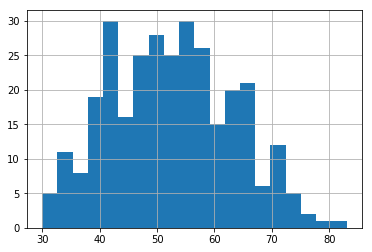

In [26]:
#Pandas Histogram of age of patients
survival_data['age'].hist(bins=20)

Text(0, 0.5, 'Count')

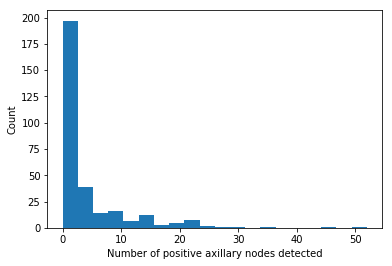

In [99]:
#Matplolib Scatter Plot - Sample is dominated by 0 nodes detected
import matplotlib.pyplot as plt

plt. hist(survival_data['num_nodes'],bins=20)
plt.xlabel('Number of positive axillary nodes detected')
plt.ylabel('Count')

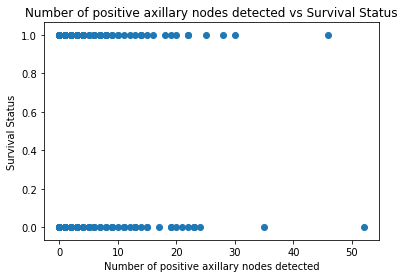

In [33]:
#Matplotlib Scatter Plot - Attempt to see if number of axillary nodes affects survival status. Difficult to interpret.
plt.scatter(survival_data['num_nodes'],survival_data['survival_status'])
plt.title('Number of positive axillary nodes detected vs Survival Status')
plt.xlabel('Number of positive axillary nodes detected')
plt.ylabel('Survival Status')
plt.show()

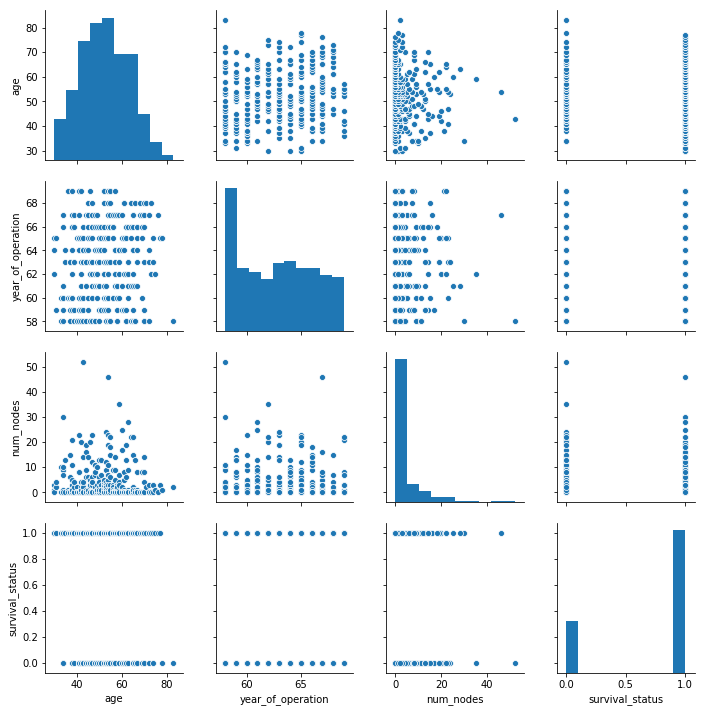

In [31]:
#Seaborn Plot
import seaborn as sns
sns.pairplot(survival_data)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [38]:
import numpy as np
print('Correlation: survival status vs age\n', np.corrcoef(survival_data['survival_status'],survival_data['age']),'\n')
print('Correlation: survival status vs year of operation\n', np.corrcoef(survival_data['survival_status'],survival_data['year_of_operation']),'\n')
print('Correlation: survival status vs number of positive axillary nodes detected\n', np.corrcoef(survival_data['survival_status'],survival_data['num_nodes']),'\n')

Correlation: survival status vs age
 [[ 1.         -0.06795032]
 [-0.06795032  1.        ]] 

Correlation: survival status vs year of operation
 [[1.         0.00476818]
 [0.00476818 1.        ]] 

Correlation: survival status vs number of positive axillary nodes detected
 [[ 1.         -0.28676757]
 [-0.28676757  1.        ]] 



In [101]:
print('Mean number of nodes with survival status 1: ', survival_data['num_nodes'].where(survival_data['survival_status']==1).mean())

Mean number of nodes with survival status 1:  2.7911111111111113


In [102]:
print('Mean number of nodes with survival status 0: ', survival_data['num_nodes'].where(survival_data['survival_status']==0).mean())

Mean number of nodes with survival status 0:  7.45679012345679


The sample data contains patients of a normally distributed age range of 30-83; the year of operation of 1958-1969; and number of positive axillary nodes detected , of which is dominated by 0 counts. There is perhaps a tiny positive correlation (.005) of survival status with year of operation, maybe due to improvements in detection or surgery methods, however the relationship is most likely nothing. There is a small negative correlation (-.068) of survival statuts with age, mostly likely due to natural aging. There is a small negative correlation (-.287) of survival status with number of positive auxillary nodes detected. The correlation value is largely subjected by the dominance of 0 counts of axillary nodes in the sample. However, once initial axillary nodes are found, the data suggests an increased risk to survival within 5 years, mostly likely contributing to onset of cancer. This is apparent in the crosstab calculation of survival status vs number of axillary nodes (see code block #92). Further, the risk to survival appears to rise with more axially nodes found. 